<a href="https://colab.research.google.com/github/Keshav1516/fashion_recommendation_system/blob/main/Fashion_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Loading the dataset in our environment.
from zipfile import ZipFile
import os

zip_file_path= "/content/de18b-women-fashion.zip"
extraction_directory = '/content/women_fashion/'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['women fashion', '__MACOSX']


In [4]:
# correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated= os.path.join(extraction_directory, "women fashion")

# list the files in the updated directory
extracted_files_updated= os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['dark blue, knee-length dress with thin straps.jpg',
  'metallic-looking jacket with intricate designs and fringes hanging from the sleeves.jpg',
  'short, white, sleeveless dress with thin straps.jpg',
  'one-shoulder, fitted dress that features sequin embellishments and sheer panels.jpg',
  'shiny, silver, wrap-style dress with long sleeves.jpg',
  'sleeveless dress adorned with pink sequins.jpg',
  'red dress adorned with an intricate white pattern.jpg',
  'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
  'Sleeveless-Ruched-Tight-Fashion-Sexy-Bodycon-Party-Women-Club-Dresses.webp',
  'bright red kurta with an intricate patterned design.jpg'],
 97)

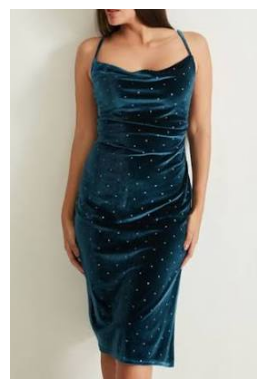

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

# function to load and display an image
def display_image(file_path):
  image= Image.open(file_path)
  plt.imshow(image)
  plt.axis("off")
  plt.show()

# display the first image to understand its characteristics
first_image_path= os.path.join(extraction_directory_updated, extracted_files_updated[0])
display_image(first_image_path)

In [8]:
# Creating a list of all image file paths
import glob

# directory path containing your images
image_directory = "/content/women_fashion/women fashion"

image_paths_list= [file for file in glob.glob(os.path.join(image_directory, "**")) if file.endswith((".jpg", ".png", ".jpeg", "webp"))]

# print the list of image file paths
print(image_paths_list)

['/content/women_fashion/women fashion/dark blue, knee-length dress with thin straps.jpg', '/content/women_fashion/women fashion/metallic-looking jacket with intricate designs and fringes hanging from the sleeves.jpg', '/content/women_fashion/women fashion/short, white, sleeveless dress with thin straps.jpg', '/content/women_fashion/women fashion/one-shoulder, fitted dress that features sequin embellishments and sheer panels.jpg', '/content/women_fashion/women fashion/shiny, silver, wrap-style dress with long sleeves.jpg', '/content/women_fashion/women fashion/sleeveless dress adorned with pink sequins.jpg', '/content/women_fashion/women fashion/red dress adorned with an intricate white pattern.jpg', '/content/women_fashion/women fashion/anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', '/content/women_fashion/women fashion/Sleeveless-Ruched-Tight-Fashion-Sexy-Bodycon-Party-Women-Club-Dresses.webp', '/content/women_fashion/women fashion/bright red kurta 

In [19]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model= VGG16(weights="imagenet", include_top=False)
model= Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(image_path):
  img= image.load_img(image_path, target_size=(224,224))
  img_array= image.img_to_array(img)
  img_array_expanded= np.expand_dims(img_array, axis=0)
  return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
  features= model.predict(preprocessed_img)
  flattened_features= features.flatten()
  normalized_features= flattened_features/np.linalg.norm(flattened_features)
  return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
  preprocessed_img = preprocess_image(img_path)
  features = extract_features(model, preprocessed_img)
  all_features.append(features)
  all_image_names.append(os.path.basename(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [23]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
      # pre-process the input image and extract features
      preprocessed_img= preprocess_image(input_image_path)
      input_features= extract_features(model, preprocessed_img)

      # calculate similarities and find the top N similar images
      similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
      similar_indices = np.argsort(similarities)[-top_n:]

      # filter out the input image index from similar_indices
      similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

      # display the input image
      plt.figure(figsize=(15, 10))
      plt.subplot(1, top_n + 1, 1)
      plt.imshow(Image.open(input_image_path))
      plt.title("Input Image")
      plt.axis('off')

      # display similar images
      for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

      plt.tight_layout()
      plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step


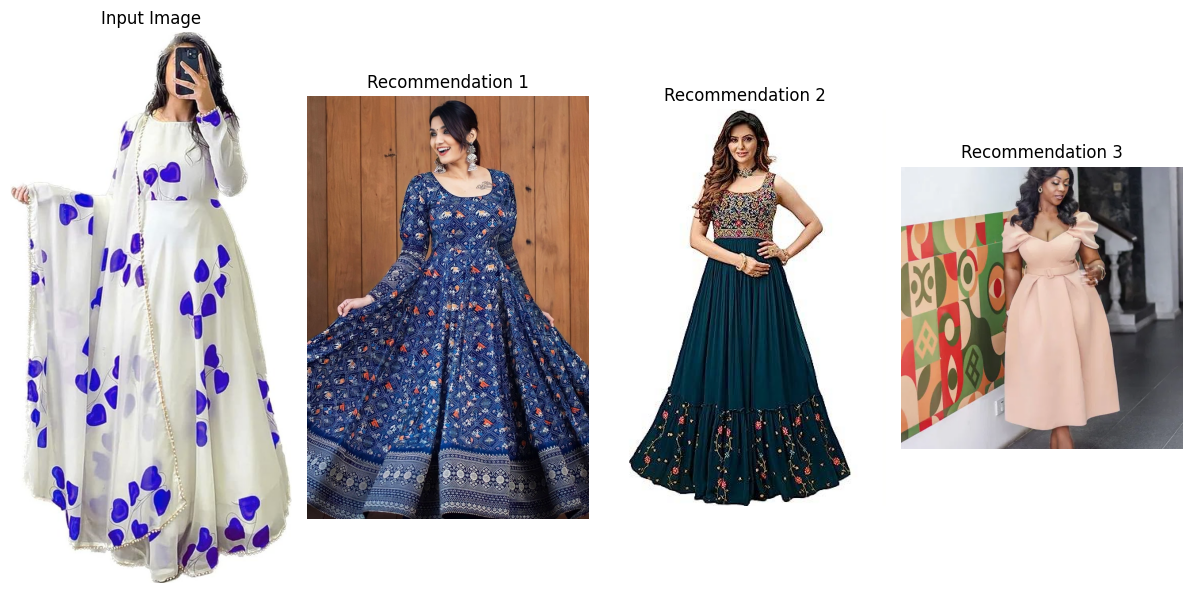

In [25]:
input_image_path = '/content/women_fashion/women fashion/Anarkali suit with a modern twist.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)